In [1]:
import json
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import feltorutilities as fp
import magneticfielddb as mag
import simplesimdb as simplesim
import xarray as xr
import xfeltor
import time

# plt.rcParams.update({'font.size': 22})
# pd.set_option('display.float_format', lambda x: '%.2e' % x)

Let's first plot the q-profile

In [2]:
data = simplesim.Manager( directory="./resistivity-scan-data", filetype="nc")
diag = simplesim.Manager( executable="./feltordiag.sh", directory="resistivity-scan-diag", filetype="nc")

In [3]:
#with open data.files()[0]['outputfile'] 
dd = Dataset( data.files()[0]['outputfile'])
da = Dataset( diag.files()[0]['outputfile'])


In [4]:
pp = json.loads( da.inputfile )
rho_t = da['rho_t'][:]
rho_p = da['rho_p'][:]
lcfs = np.argmax( rho_t[np.where( rho_t < 1)])
idx = lcfs
area = da['psi_area'][:]
volume = da['psi_vol'][:]
num = {"R_0" : pp["magnetic_field"]['params']["R_0"], **pp["physical"]}
fp.numerical2physical( num, pp['physical'])
print( "rho_s is ", fp.parameters2quantity( pp['physical'], 'rho_s'))
pp['physical']

Invert for given numerical parameters
rho_s is  0.001000000000109118


{'beta': 0.0001,
 'epsilon_D': 0.0004145891932469323,
 'mu': -0.00027244371074816386,
 'nu_parallel': [3700, 114],
 'resistivity': 1e-06,
 'tau': 1.0,
 'viscosity': 'value',
 'm_i': 3.3435837204626655e-27,
 'T_e': 77.76088503574778,
 'T_i': 77.76088503574992,
 'n_0': 1.0365292392108245,
 'B_0': 1.2738887530770124,
 'R': 0.5449999998797926}

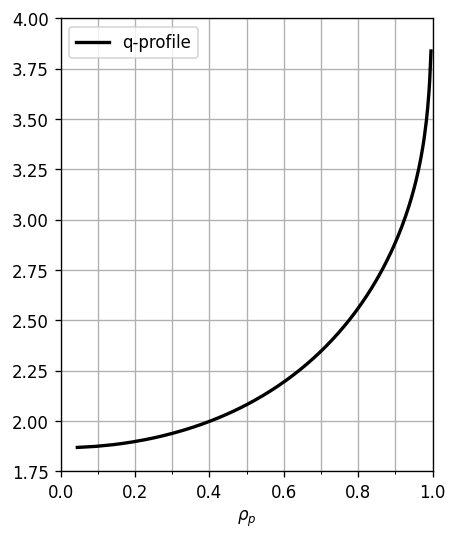

In [5]:
frows = 1
fcols = 1
fig,ax=plt.subplots(frows,fcols,figsize=(fcols*4,frows*5),dpi= 120, facecolor='w', edgecolor='k')

ax.plot( rho_p[0:lcfs] , da['q-profile'][:lcfs], lw=2, color = "k", label='q-profile')
ax.set_xlim([0,1])
ax.set_ylim([1.75,4])
ax.set_xlabel( r"$\rho_p$")

# ax.set_ylabel( r"$q$")
ax.xaxis.set_minor_locator(tck.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.grid(which="both")
ax.yaxis.grid(which="both") 
plt.legend(loc = 'upper left')
plt.savefig( 'q-profile.png',bbox_inches='tight')
plt.show()

Wall levels =  [0.55, 0.97, 1.15]


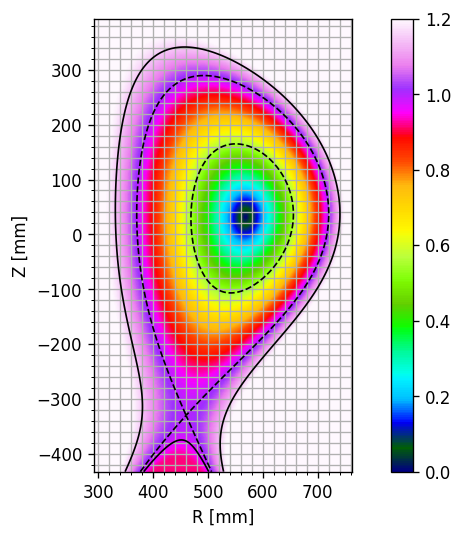

In [23]:
x = dd["x"][:]
y = dd["y"][:]
lvls =list()
lvls=pp["boundary"]["wall"]["boundary"].copy()

lvls.append(pp["source"]["damping"]["boundary"])
lvls=sorted(lvls)
print( "Wall levels = ", lvls)

frows = 1
fcols = 1
fig,ax=plt.subplots(1,1,figsize=(fcols*4,frows*5),dpi= 120, facecolor='w', edgecolor='k')
 
im = ax.pcolormesh(x,y,dd["Rho_p"][:,:],vmin=0,vmax=1.2,cmap="gist_ncar", shading ="gouraud")
fig.colorbar(im, ax=ax)
im = ax.contour( x, y, dd["Rho_p"][:,:], levels=lvls[2:3], linewidths=1,colors='k')
im = ax.contour( x, y, dd["Rho_p"][:,:], levels=[0.55,1], linestyles='dashed',linewidths=1,colors='k')
im = ax.contour( x, y[0:40], dd["Rho_p"][0:40,:], levels=lvls[1:2], linewidths=1,colors='k')
ax.axis("scaled")
start, end = ax.get_xlim()
#     ax[rr][cc].xaxis.set_ticks(np.arange(start, end, 20))
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.grid(which="both")
ax.yaxis.grid(which="both")    
# ax.set_title( r"$\rho_p$")
ax.set_xlabel( "R [mm]")
ax.set_ylabel( "Z [mm]")
plt.savefig( 'wall-calibration.png',bbox_inches='tight')
plt.show()

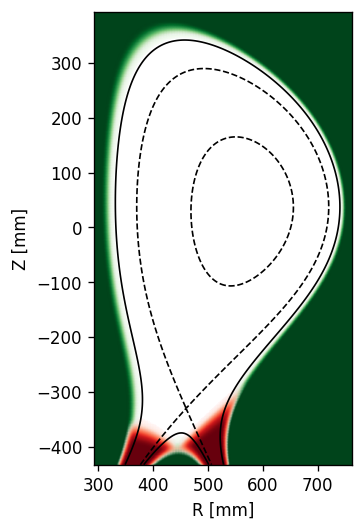

In [24]:
frows = 1
fcols = 1
fig,ax=plt.subplots(1,1,figsize=(fcols*4,frows*5),dpi= 120, facecolor='w', edgecolor='k')
  
# plot = dd["MagneticTransition"][:,:]
plot = dd["Wall"][:,:]
# plot = np.ma.masked_array( plot, plot==0)
normalize = colors.Normalize( np.min(plot), np.max(plot))
im = ax.pcolormesh(x, y, plot, alpha=normalize( plot),
                      cmap="Greens", shading="gouraud") 
# fig.colorbar(im, ax=ax)

im = ax.contour( x, y, dd["Rho_p"][:,:], levels=lvls[2:3], linewidths=1,colors='k')
im = ax.contour( x, y, dd["Rho_p"][:,:], levels=[0.55,1], linestyles='dashed',linewidths=1,colors='k')
im = ax.contour( x, y[0:40], dd["Rho_p"][0:40,:], levels=lvls[1:2], linewidths=1,colors='k')
plot = dd["Sheath"][:,:]
# plot = np.ma.masked_array( plot, plot==0)
normalize = colors.Normalize( np.min(plot), np.max(plot))
im = ax.pcolormesh(x, y, plot, alpha=normalize( plot),
                  cmap="Reds", shading="gouraud") 

ax.axis("scaled")

#     ax[rr][cc].xaxis.grid(which="both")
#     ax[rr][cc].yaxis.grid(which="both")  
#     ax[rr][cc].xaxis.set_minor_locator(tck.AutoMinorLocator())
#     ax[rr][cc].yaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.set_title( "Magnetic Transition and Sheath")
ax.set_xlabel( "R [mm]")
ax.set_ylabel( "Z [mm]")
plt.savefig( "MagneticTransition.png",bbox_inches='tight')
plt.show()